# Get a LSST Simulated Cadence for Arbitrarty Sky Position
___


___

In [1]:
"""

"""

from __future__ import print_function

try:
    from importlib import reload
except:
    pass


from matplotlib import pyplot as plt

import os
import warnings

import numpy as np
import pandas as pd
import astropy as ap
import sfdmap

import sqlite3
from sqlalchemy import create_engine

from astropy import units as u
from astropy.coordinates import SkyCoord

import LSST_tools.utils as utils 

Connect to .db file that contains the opsim output, read into a dataframe, `opsimdf`

In [12]:
# %%timeit ## 1 loop, best of 3: 1min 31s per loop 
# opsimdbpath = os.environ.get('OPSIMDBPATH')
# print(opsimdbpath)
opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db"

conn = create_engine('sqlite:///'+opsimdbpath, echo = False)
opsimdf = pd.read_sql_table('Summary', con=conn)

In [13]:
#%%timeit ## The slowest run took 39.04 times longer than the fastest. This could mean that an intermediate result is being cached.
#         ## 1000 loops, best of 3: 246 µs per loop
n = 1
pos_df = utils.generate_coordinates(n)

Add extinction to the dataframe

In [38]:
#%%timeit ## 1 loop, best of 3: 88.6 ms per loop
df = utils.find_MW_extinction(pos_df) 

Check the positions are sensible

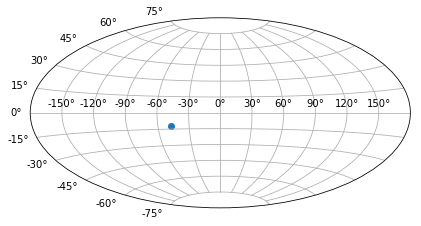

In [39]:
#%%timeit ## 1 loop, best of 3: 235 ms per loop
utils.plot_position_points(df)

Connecting to `.db` takes ages (~1min), and is a pain if you mess up, so create a 'working' instance to fiddle with

In [47]:
working_df = opsimdf

## Identifying Fields
___
We want to find out which field(s) the position is in. Create table that tells us the field centres, and find the edges.

In [55]:
# working_df = utils.get_field_corners(working_df.drop_duplicates("fieldID"))[['fieldRA', 'fieldDec']]
working_df = utils.get_field_corners(pd.DataFrame(working_df.drop_duplicates("fieldID"))[['fieldID', 'fieldRA', 'fieldDec']])

In [56]:
working_df

,fieldRA,fieldDec,RA_upper,RA_lower,Dec_upper,Dec_lower
0,1.720374,-0.936476,1.750917,1.689831,-0.967019,-0.905933
1,1.648235,-0.903353,1.678778,1.617692,-0.933896,-0.872810
2,1.563788,-0.915583,1.594331,1.533245,-0.946126,-0.885040
3,1.477422,-0.924531,1.507965,1.446879,-0.955074,-0.893988
4,1.389669,-0.930365,1.420212,1.359126,-0.960908,-0.899822
5,1.301075,-0.933239,1.331618,1.270532,-0.963782,-0.902696
6,1.212198,-0.933238,1.242741,1.181655,-0.963781,-0.902695
7,1.123604,-0.930366,1.154147,1.093061,-0.960909,-0.899823
8,1.035849,-0.924530,1.066392,1.005306,-0.955073,-0.893987
9,0.988892,-0.827713,1.019435,0.958349,-0.858256,-0.797170
